In [46]:
import sys
sys.path.append('../')
import PIL.Image
import pywt
import numpy as np
from tools.img import fft_2d_3c, ifft_2d_3c, dct_2d_3c_slide_window, idct_2d_3c_slide_window
import matplotlib.pyplot as plt
from tools.img import clip

test img == IDCT(DCT(img))

In [47]:
scale = 224
img = PIL.Image.open('../resource/example/000107.jpg')
x = np.array(img.resize((scale, scale)))
x_dct = dct_2d_3c_slide_window(x.astype(float), scale)
x_idct = idct_2d_3c_slide_window(x_dct, scale)
(x - x_idct).mean()
del x_idct, x_dct

manipulate the Im(x_fft) and plot the results

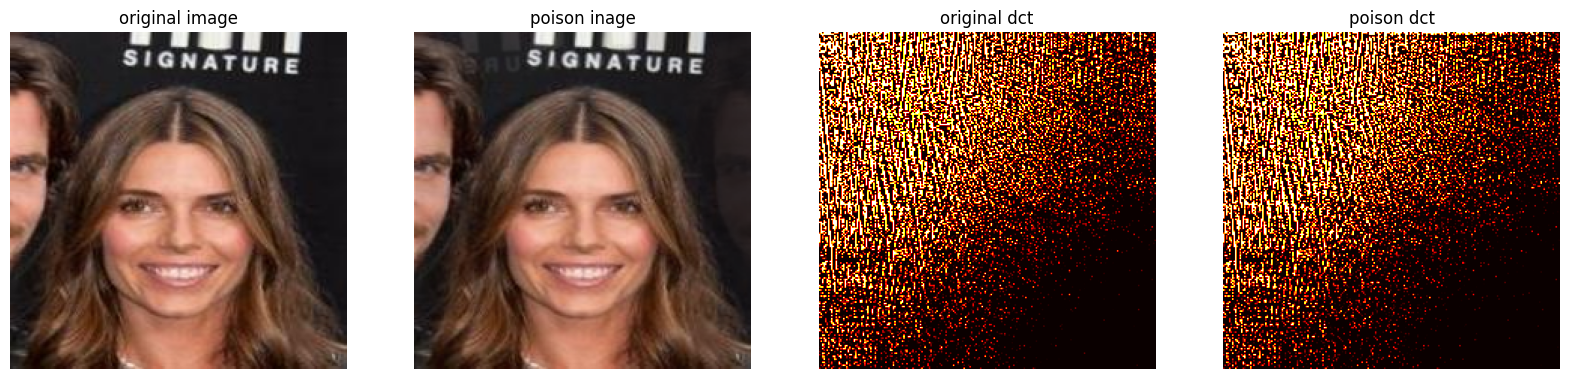

In [52]:
x_fft = fft_2d_3c(x)
x_fft_poison = x_fft.real + 1j * x_fft.imag * 0.8
x_poison = ifft_2d_3c(x_fft_poison).real.astype(np.uint8)

x_dct = dct_2d_3c_slide_window(x.astype(float), scale)
x_p_dct = dct_2d_3c_slide_window(x_poison.astype(float), scale)

_, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(x)
ax[0].set_title('original image')
ax[0].axis('off')

ax[1].imshow(x_poison)
ax[1].set_title('poison inage')
ax[1].axis('off')

ax[2].imshow(clip(x_dct[:, :, 0]), cmap='hot')
ax[2].set_title('original dct')
ax[2].axis('off')

ax[3].imshow(clip(x_p_dct[:, :, 0]), cmap='hot')
ax[3].set_title('poison dct')
ax[3].axis('off')

plt.show()